In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-danger">
    
<b>EXERCISE 1.</b> The hourly wages in a particular industry are normally distributed with mean \\$13.20 and standard deviation \\$2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)
    
</div>

In [2]:
mu = 13.20
sigma = 2.50
x = 12.20
n = 40

In [ ]:
# HYPOTHESIS

# H0: mu = 13.20
# H1: mu < 13.20

In [ ]:
# STATE DECISION RULE

# If z is smaller than -2.326, reject the null hypothesis.

In [3]:
# TEST STATISTIC

z = (x-mu) / (sigma / np.sqrt(n))
z

-2.5298221281347035

In [4]:
z < -2.326

True

In [ ]:
# Since z=-2.530 is smaller than -2.326, so we can reject the null hypothesis.

In [5]:
# P-VALUE

pvalue = stats.norm.cdf(z)
pvalue

0.005706018193000826

In [6]:
# CONCLUSION (DECISION)

alpha = 0.01

if pvalue < alpha:
    print('Reject The Null')
else:
    print('Fail to Reject The Null')

Reject The Null


In [ ]:
# this company can be accused of paying substandard wages

<div class="alert alert-block alert-danger">
    
<b>EXERCISE 2.</b> Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?
    
</div>

In [7]:
soil = pd.read_excel("soil.xlsx")

In [8]:
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [9]:
soil.shape

(35, 2)

In [10]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [11]:
# Perform Levene test for equal variances

# H0: The population variances are equal
# H1: There is a difference between the variances in the population

# The small p-value suggests that the populations do not have equal variances.

leveneTest = stats.levene(soil.Soil1.dropna(), soil.Soil2)
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [12]:
leveneTest.pvalue < 0.01

False

In [ ]:
# Equal Variances Assumed

In [ ]:
# HYPOTHESIS

# H0: mu1 = mu2
# H1: mu1 != mu2

In [13]:
# TEST STATISTIC AND P-VALUE

IndTest = stats.ttest_ind(soil.Soil1.dropna(), soil.Soil2, equal_var=True)
IndTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [14]:
# CONCLUSION (DECISION)

alpha = 0.01

if IndTest.pvalue < alpha:
    print('Reject The Null')
else:
    print('Fail to Reject The Null')

Reject The Null


In [ ]:
# There is enough evidence to conclude the mean shear strength for the two soil types is different.

<div class="alert alert-block alert-danger">
    
<b>EXERCISE 3.</b> The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.
    
</div>

#### 1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

In [15]:
pisaTest = pd.read_excel("2015 PISA Test.xlsx")

In [16]:
pisaTest

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [17]:
pisaTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [18]:
pisaTest[pisaTest['Continent_Code'].isnull()]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NaN,88.470000,515.6474,526.6678,527.7047
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
18,DOM,NaN,54.215766,327.7020,357.7377,331.6388
45,MEX,NaN,57.431043,408.0235,423.2765,415.7099
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [19]:
pisaTest['Continent_Code'].unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [20]:
pisaTest['Continent_Code'].fillna('NA', inplace=True)

In [21]:
pisaTest['Continent_Code'].unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

In [22]:
pisaTest.groupby('Continent_Code').agg(['count', 'mean', 'std', 'var', 'sem', min, max]).T

Continent_Code                        AF           AS           EU  \
internet_users_per_100 count    2.000000    17.000000    37.000000   
                       mean    43.359918    68.455613    77.274888   
                       std      7.297226    21.086060    12.425773   
                       var     53.249507   444.621918   154.399841   
                       sem      5.159918     5.114121     2.042785   
                       min     38.200000    21.976068    53.744979   
                       max     48.519836    92.884826    98.200000   
Math                   count    2.000000    17.000000    37.000000   
                       mean   363.212100   466.216647   477.981449   
                       std      5.099513    64.356490    35.150403   
                       var     26.005030  4141.757822  1235.550805   
                       sem      3.605900    15.608742     5.778691   
                       min    359.606200   380.259000   371.311400   
                       max    366.818000   564.189700   521.250600   
Reading                count    2.000000    17.000000    37.000000   
                       mean   355.457400   454.059682   476.164608   
                       std      7.916909    57.048962    37.720545   
                       var     62.677447  3254.584049  1422.839540   
                       sem      5.598100    13.836406     6.201219   
                       min    349.859300   346.549000   351.741500   
                       max    361.055500   535.100200   526.424700   
Science                count    2.000000    17.000000    37.000000   
                       mean   381.074250   467.945847   478.299381   
                       std      7.536556    56.671371    34.450616   
                       var     56.799679  3211.644321  1186.844969   
                       sem      5.329150    13.744826     5.663646   
                       min    375.745100   386.485400   383.682400   
                       max    386.403400   555.574700   534.193700   

Continent_Code                         NA          OC          SA  
internet_users_per_100 count     5.000000    2.000000    7.000000  
                       mean     66.886792   86.391704   60.180494  
                       std      14.364359    2.589686    9.772455  
                       var     206.334814    6.706475   95.500869  
                       sem       6.423937    1.831185    3.693641  
                       min      54.215766   84.560519   40.900000  
                       max      88.470000   88.222889   69.198471  
Math                   count     5.000000    2.000000    7.000000  
                       mean    424.250960  494.559750  402.887700  
                       std      71.717058    0.938401   18.128894  
                       var    5143.336351    0.880597  328.656783  
                       sem      32.072843    0.663550    6.852078  
                       min     327.702000  493.896200  377.069500  
                       max     515.647400  495.223300  422.671400  
Reading                count     5.000000    2.000000    7.000000  
                       mean    446.420920  506.085650  425.359229  
                       std      66.614744    4.504341   19.709688  
                       var    4437.524053   20.289087  388.471816  
                       sem      29.791019    3.185050    7.449562  
                       min     357.737700  502.900600  397.541400  
                       max     526.667800  509.270700  458.570900  
Science                count     5.000000    2.000000    7.000000  
                       mean    438.180760  511.648700  421.747186  
                       std      76.789918    2.340241   18.470319  
                       var    5896.691519    5.476726  341.152678  
                       sem      34.341495    1.654800    6.981124  
                       min     331.638800  509.993900  396.683600  
                       max     527.704700  513.303500  446.956100

In [23]:
pisaTest.groupby('Continent_Code').quantile([.25, .5, .75])

internet_users_per_100        Math     Reading  \
Continent_Code                                                        
AF             0.25               40.779959  361.409150  352.658350   
               0.50               43.359918  363.212100  355.457400   
               0.75               45.939877  365.015050  358.256450   
AS             0.25               50.300000  403.833200  408.102200   
               0.50               74.000000  459.816000  433.542300   
               0.75               84.948353  531.296100  508.690500   
EU             0.25               68.632900  464.040100  452.514300   
               0.50               76.184000  489.728700  487.250100   
               0.75               87.479056  503.722000  499.814600   
NA             0.25               57.431043  400.253400  423.276500   
               0.50               59.762950  408.023500  427.487500   
               0.75               74.554202  469.628500  496.935100   
OC             0.25               85.476112  494.227975  504.493125   
               0.50               86.391704  494.559750  506.085650   
               0.75               87.307296  494.891525  507.678175   
SA             0.25               57.116462  388.102200  416.126900   
               0.50               64.289000  409.033300  425.303100   
               0.75               66.321532  417.617650  431.922700   

                        Science  
Continent_Code                   
AF             0.25  378.409675  
               0.50  381.074250  
               0.75  383.738825  
AS             0.25  417.611200  
               0.50  456.483600  
               0.75  523.277400  
EU             0.25  460.774900  
               0.50  490.225000  
               0.75  501.936900  
NA             0.25  415.709900  
               0.50  419.608000  
               0.75  496.242400  
OC             0.25  510.821300  
               0.50  511.648700  
               0.75  512.476100  
SA             0.25  408.205450  
               0.50  424.590500  
               0.75  433.794600

In [24]:
pisaTest.groupby('Continent_Code').corr()

internet_users_per_100      Math  \
Continent_Code                                                            
AF             internet_users_per_100                1.000000  1.000000   
               Math                                  1.000000  1.000000   
               Reading                               1.000000  1.000000   
               Science                               1.000000  1.000000   
AS             internet_users_per_100                1.000000  0.382206   
               Math                                  0.382206  1.000000   
               Reading                               0.358864  0.950766   
               Science                               0.326062  0.976521   
EU             internet_users_per_100                1.000000  0.640105   
               Math                                  0.640105  1.000000   
               Reading                               0.591298  0.946071   
               Science                               0.621850  0.965628   
NA             internet_users_per_100                1.000000  0.938760   
               Math                                  0.938760  1.000000   
               Reading                               0.939705  0.995240   
               Science                               0.922947  0.994786   
OC             internet_users_per_100                1.000000  1.000000   
               Math                                  1.000000  1.000000   
               Reading                               1.000000  1.000000   
               Science                               1.000000  1.000000   
SA             internet_users_per_100                1.000000  0.700917   
               Math                                  0.700917  1.000000   
               Reading                               0.670150  0.829681   
               Science                               0.756945  0.917029   

                                        Reading   Science  
Continent_Code                                             
AF             internet_users_per_100  1.000000  1.000000  
               Math                    1.000000  1.000000  
               Reading                 1.000000  1.000000  
               Science                 1.000000  1.000000  
AS             internet_users_per_100  0.358864  0.326062  
               Math                    0.950766  0.976521  
               Reading                 1.000000  0.967582  
               Science                 0.967582  1.000000  
EU             internet_users_per_100  0.591298  0.621850  
               Math                    0.946071  0.965628  
               Reading                 1.000000  0.957500  
               Science                 0.957500  1.000000  
NA             internet_users_per_100  0.939705  0.922947  
               Math                    0.995240  0.994786  
               Reading                 1.000000  0.998817  
               Science                 0.998817  1.000000  
OC             internet_users_per_100  1.000000  1.000000  
               Math                    1.000000  1.000000  
               Reading                 1.000000  1.000000  
               Science                 1.000000  1.000000  
SA             internet_users_per_100  0.670150  0.756945  
               Math                    0.829681  0.917029  
               Reading                 1.000000  0.949564  
               Science                 0.949564  1.000000

***

In [25]:
pisaTest.skew(numeric_only=True)

internet_users_per_100   -0.597903
Math                     -0.383761
Reading                  -0.604482
Science                  -0.392631
dtype: float64

In [26]:
pisaTest.groupby('Continent_Code').skew(numeric_only=True)

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,NaN,NaN,NaN,NaN
AS,-0.775229,0.144656,-0.099169,0.135810
EU,-0.049351,-1.245494,-1.325443,-0.881399
NA,1.021132,-0.069123,-0.100080,-0.288850
OC,NaN,NaN,NaN,NaN
SA,-1.469258,-0.372256,0.325499,-0.207071


In [27]:
pisaTest.kurtosis(numeric_only=True)

internet_users_per_100    0.117203
Math                     -0.753192
Reading                  -0.559449
Science                  -0.609420
dtype: float64

In [28]:
pisaTest.groupby('Continent_Code').apply(pd.DataFrame.kurt)

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,NaN,NaN,NaN,NaN
AS,-0.323744,-1.626302,-1.220215,-1.668903
EU,-0.845386,1.104173,1.909195,0.336346
NA,-0.460021,-0.377645,-1.001579,-0.636785
OC,NaN,NaN,NaN,NaN
SA,2.256484,-1.964049,0.588333,-1.217229


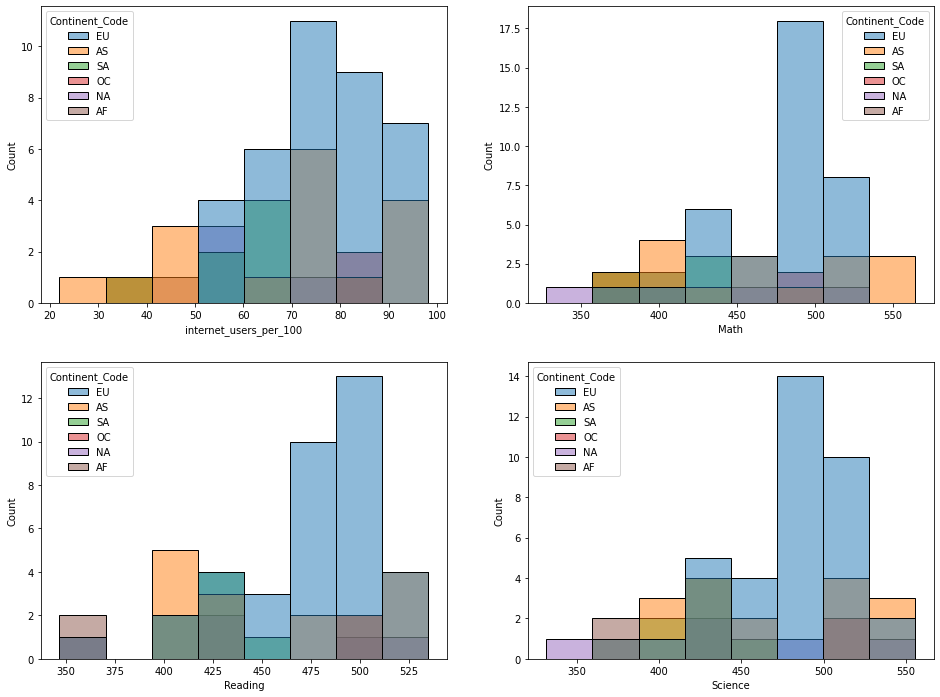

In [29]:
fig, ax = plt.subplots(2,2, figsize=(16,12))

sns.histplot(pisaTest, x="internet_users_per_100", hue="Continent_Code", ax=ax[0,0])
sns.histplot(pisaTest, x="Math", hue="Continent_Code", ax=ax[0,1])
sns.histplot(pisaTest, x="Reading", hue="Continent_Code", ax=ax[1,0])
sns.histplot(pisaTest, x="Science", hue="Continent_Code", ax=ax[1,1]);

***

#### 2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [30]:
pisaTest.groupby('Continent_Code').size()

Continent_Code
AF     2
AS    17
EU    37
NA     5
OC     2
SA     7
dtype: int64

In [31]:
sample1 = pisaTest[pisaTest['Continent_Code'] == 'EU']['Math']
sample2 = pisaTest[pisaTest['Continent_Code'] == 'AS']['Math']

In [32]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [33]:
IndTest = stats.ttest_ind(sample1, sample2, equal_var=True)

In [34]:
IndTest

Ttest_indResult(statistic=0.8700553179679787, pvalue=0.38826888111307556)

In [35]:
# solution-2

IndTest2 = stats.ttest_ind_from_stats(mean1=sample1.mean(), std1=sample1.std(), nobs1=sample1.count(), 
                                      mean2=sample2.mean(), std2=sample2.std(), nobs2=sample2.count(), 
                                      equal_var=True)
IndTest2

Ttest_indResult(statistic=0.8700553179679787, pvalue=0.38826888111307556)

In [36]:
# DECISION

alpha = 0.05

if IndTest.pvalue < alpha:
    print('Reject The Null')
else:
    print('Fail to Reject The Null')

Fail to Reject The Null


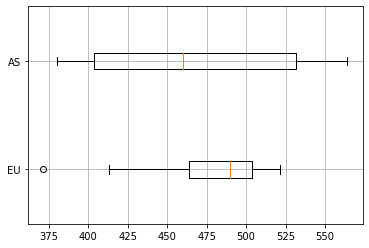

In [37]:
plt.boxplot([sample1, sample2], vert=False, labels=['EU', 'AS'])

plt.grid();

***

<div class="alert alert-block alert-danger">
    
<b>EXERCISE 4.</b> The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.
    
</div>

In [38]:
students = pd.read_excel("students_2014.xlsx")

In [39]:
students

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783.0,1995-03-22,NaT,NaT,NaN,NaN,0.0,0.0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278.0,1995-01-01,NaT,NaT,NaN,Philosophy,0.0,0.0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389.0,1994-12-31,NaT,NaT,NaN,NaN,0.0,0.0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820.0,1994-12-01,NaT,NaT,NaN,business administration,1.0,0.0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559.0,1994-11-10,NaT,NaT,NaN,NaN,1.0,1.0,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021.0,1987-07-18,2011-08-01,2017-05-08,4.0,accounting,1.0,0.0,NaN,NaN,...,87.72,84.99,65.31,NaN,In state,0.0,1.0,18.0,1.0,10.0
431,40697.0,1987-04-29,2011-08-01,2016-05-09,4.0,NaN,0.0,0.0,68.50,131.92,...,91.01,86.87,70.25,82.67,In state,0.0,3.0,26.0,6.0,15.0
432,34272.0,NaT,2011-08-01,2016-05-09,4.0,nursing,0.0,1.0,68.10,130.07,...,81.05,85.76,58.16,81.87,NaN,0.0,3.0,29.0,6.0,10.0
433,33628.0,NaT,2011-08-01,2017-05-08,4.0,Nursing,1.0,1.0,69.27,157.26,...,75.59,85.97,66.84,79.35,In state,0.0,1.0,14.0,4.0,10.0


In [40]:
students[['English', 'Math']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   English  409 non-null    float64
 1   Math     422 non-null    float64
dtypes: float64(2)
memory usage: 6.9 KB


In [41]:
students[['English', 'Math']].describe().T

,count,mean,std,min,25%,50%,75%,max
English,409.0,82.787555,6.839803,59.83,78.3300,83.150,87.1700,101.95
Math,422.0,65.468009,8.375930,35.32,60.2025,65.445,70.5675,93.78


In [ ]:
# The mean English score is much higher than the mean Math score and 
# max-min scores of English are higher than max-min scores of Math.
# There are missing values on both sides.

In [42]:
students.English.isnull().sum(), students.Math.isnull().sum()

(26, 13)

In [43]:
sections = students[['English', 'Math']].dropna()

In [44]:
sections

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52
...,...,...
430,87.72,65.31
431,91.01,70.25
432,81.05,58.16
433,75.59,66.84


In [45]:
sections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 434
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   English  398 non-null    float64
 1   Math     398 non-null    float64
dtypes: float64(2)
memory usage: 9.3 KB


#### paired samples descriptive statistics

In [ ]:
# H0: d_bar = 0   (d : difference)
# H1: d_bar != 0  

In [46]:
sections.describe().T

,count,mean,std,min,25%,50%,75%,max
English,398.0,82.744095,6.844801,59.83,78.2250,83.145,87.1650,101.95
Math,398.0,65.446834,8.462137,35.32,60.2025,65.495,70.5225,93.78


In [47]:
sections[['English', 'Math']].sem()  # standard error

English    0.343099
Math       0.424169
dtype: float64

In [48]:
sections.corr()

,English,Math
English,1.000000,0.243014
Math,0.243014,1.000000


In [ ]:
# English and Math scores are weakly and positively correlated (r = .243)

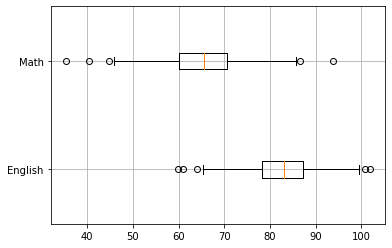

In [49]:
plt.boxplot([sections['English'], sections['Math']], vert=False
            , labels=['English', 'Math'])
plt.grid();

#### paired samples tests

In [50]:
s_mean = (sections['English'] - sections['Math']).mean()
s_mean

17.29726130653266

In [51]:
s_sd = (sections['English'] - sections['Math']).std()  # standard deviation
s_sd

9.503025782864302

In [52]:
s_se = (sections['English'] - sections['Math']).sem()  # standard error
s_se

0.4763436405515758

In [53]:
# 95% confidence interval of the difference

stats.norm.interval(0.95, loc=s_mean, scale=s_se)

(16.36364492678688, 18.230877686278443)

In [54]:
# test statistic and pvalue

pairedtest = stats.ttest_rel(sections['English'], sections['Math'])
pairedtest

Ttest_relResult(statistic=36.312568981719856, pvalue=3.0710987192210606e-128)

In [55]:
# DECISION

alpha = 0.001

if pairedtest.pvalue < alpha:
    print('Reject The Null')
else:
    print('Fail to Reject The Null')

Reject The Null


In [ ]:
# There is a significant average difference between English and Math scores
# On average, English scores were 17.3 points higher than Math scores (Confidence Interval: 95% , [16.36, 18.23])